In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos los datos a utilizar para las visualizaciones

In [4]:
# data_arch1 = [
#     ['max', 0.7415, 0.7421, 0.7396, 0.7423, 0.742],
#     ['avg', 0.7487, 0.758, 0.7562, 0.7452, 0.7562],
#     ['g_prod', 0.7554, 0.7577, 0.747, 0.7535, 0.7515],
#     ['g_max', 0.7428, 0.7445, 0.7434, 0.7397, 0.741],
#     ['g_min', 0.7444, 0.7431, 0.7405, 0.7406, 0.7429],
#     ['g_ob', 0.7559, 0.7583, 0.7497, 0.7582, 0.7552],
#     ['g_geom', 0.7486, 0.7563, 0.758, 0.7544, 0.7535],
#     ['g_u', 0.7407, 0.7451, 0.7416, 0.7491, 0.7439],
#     ['gp_max', 0.736, 0.7357, 0.7414, 0.7303, 0.7387],
#     ['gp_prod', 0.7557, 0.7548, 0.7588, 0.7573, 0.7506],
#     ['gp_geom', 0.7534, 0.7466, 0.1, 0.6547, 0.7502],
# ]

data_arch2 = [
    ['max', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    ['avg', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    ['g_prod', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711],
    ['g_max', 0.8639, 0.8669, 0.8651, 0.8639, 0.8588],
    ['g_min', 0.8658, 0.8620, 0.8618, 0.8665, 0.8657],
    ['g_ob', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697],
    ['g_geom', 0.7911, 0.7887, 0.7918, 0.7834, 0.7818],
    ['g_u', 0.8049, 0.8049, 0.8093, 0.8079, 0.8213],
    ['gp_max', 0.8701, 0.8722, 0.8680, 0.8674, 0.8681],
    ['gp_prod', 0.8442, 0.8250, 0.8388, 0.8404, 0.8297],
    ['gp_geom', 0.8340, 0.8332, 0.8328, 0.8391, 0.8392],
]

df = pd.DataFrame(data=data_arch2, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

print(df)
print(df.T)
prueba = df.T

          Test1   Test2   Test3   Test4   Test5
Model                                          
max      0.8658  0.8682  0.8606  0.8632  0.8578
avg      0.8584  0.8661  0.8602  0.8633  0.8643
g_prod   0.8750  0.8714  0.8735  0.8738  0.8711
g_max    0.8639  0.8669  0.8651  0.8639  0.8588
g_min    0.8658  0.8620  0.8618  0.8665  0.8657
g_ob     0.8735  0.8798  0.8739  0.8736  0.8697
g_geom   0.7911  0.7887  0.7918  0.7834  0.7818
g_u      0.8049  0.8049  0.8093  0.8079  0.8213
gp_max   0.8701  0.8722  0.8680  0.8674  0.8681
gp_prod  0.8442  0.8250  0.8388  0.8404  0.8297
gp_geom  0.8340  0.8332  0.8328  0.8391  0.8392
Model     max     avg  g_prod   g_max   g_min    g_ob  g_geom     g_u  gp_max  \
Test1  0.8658  0.8584  0.8750  0.8639  0.8658  0.8735  0.7911  0.8049  0.8701   
Test2  0.8682  0.8661  0.8714  0.8669  0.8620  0.8798  0.7887  0.8049  0.8722   
Test3  0.8606  0.8602  0.8735  0.8651  0.8618  0.8739  0.7918  0.8093  0.8680   
Test4  0.8632  0.8633  0.8738  0.8639  0.8665  0.873

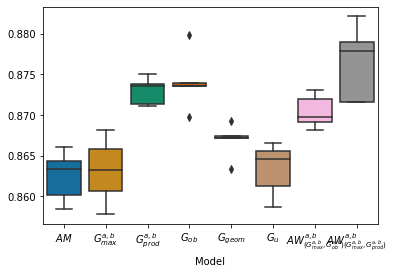

In [3]:
fig = plt.figure()
ax = sns.boxplot(data=df.head(8).T, palette='colorblind')

Guardamos los plots generados en la carpeta reports/plots

In [4]:
import os
PATH_REPORTS = os.path.join('..', '..', 'reports')

PATH_plots = os.path.join(PATH_REPORTS, 'plots')
try:
    os.mkdir(PATH_plots)
except FileExistsError as e:
    pass

fig.savefig(os.path.join(PATH_plots, 'groupings_arch1_boxplot.pdf'))

# Comparación entre gráficas de entrenamiento

Nota: Vamos a cargar los datos a partir del formato exportado por TensorBoard

In [5]:
import os
PATH_REPORTS = os.path.join('..', '..', 'reports')
PATH_plots = os.path.join(PATH_REPORTS, 'plots')
PATH_log_data = os.path.join(PATH_REPORTS, 'log_data')

Cargamos los datos exportados por tensorboard en formato csv

In [6]:
test_log_folder = os.path.join(PATH_log_data, 'best_methods')
data_names = []
data = []
for log_file in os.listdir(test_log_folder):
    data_names.append(log_file)
    data.append(pd.read_csv(os.path.join(test_log_folder, log_file)))

FileNotFoundError: [Errno 2] No such file or directory: '../../reports/log_data/best_methods'

In [9]:
print(data_names)
print(data[0]['Value'].values)

data_names = ['max', 'g_ob', 'g_prod']


[]


IndexError: list index out of range

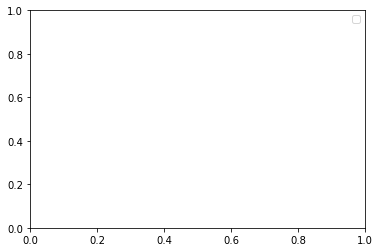

In [10]:
fig = plt.figure()
for data_model in data:
    sns.lineplot(data=data_model['Value'])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training.pdf'))

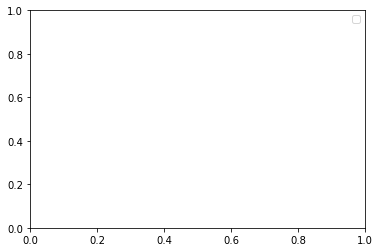

In [11]:
fig = plt.figure()
for data_model in data:
    sns.lineplot(data=data_model['Value'][:30])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training30epochs.pdf'))

In [12]:
soft_data = []
for data_model in data:
    copy_data = data_model
    copy_data['Value'] = copy_data['Value'].ewm(alpha=0.6).mean()
    soft_data.append(copy_data)
print(soft_data)

[]


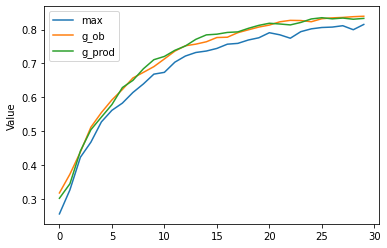

In [85]:
fig = plt.figure()
for data_model in soft_data:
    sns.lineplot(data=data_model['Value'][:30])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training30epochs_soft.pdf'))